# Image Types

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

### By Channel
1. **Binary**
Contains only two possible values: 0 or 1 for each pixel.
2. **Grayscale**
Each pixel has an intensity value ranging from 0 to 255 (1 byte per pixel).
3. **Color**
Typically uses the RGB model, and may include an additional alpha (transparency) channel.

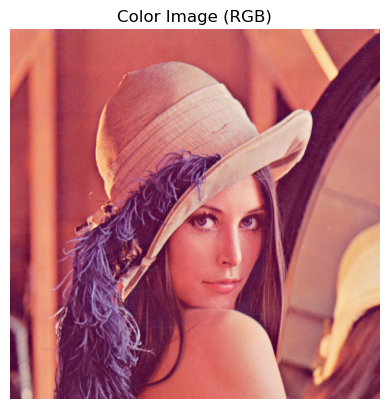

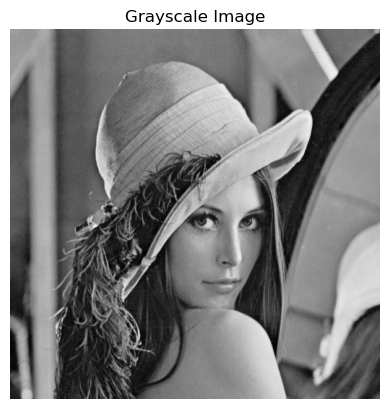

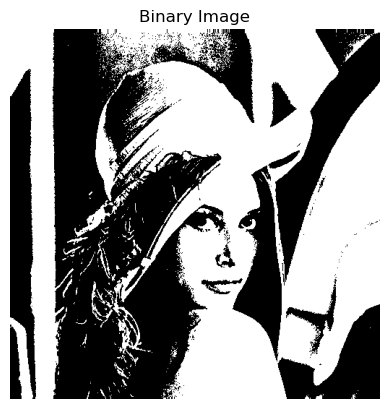

In [3]:
# Read an image (color by default in OpenCV is BGR)
img_color = cv2.imread("lena.png")

# Convert BGR to RGB for correct display in matplotlib
img_color_rgb = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)

plt.imshow(img_color_rgb)
plt.title("Color Image (RGB)")
plt.axis("off")
plt.show()

img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)

plt.imshow(img_gray, cmap="gray")
plt.title("Grayscale Image")
plt.axis("off")
plt.show()

_, img_binary = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)

plt.imshow(img_binary, cmap="gray")
plt.title("Binary Image")
plt.axis("off")
plt.show()

### By Color Space
1. **RGB**
A color model with three channels: Red, Green, and Blue. Each channel's intensity ranges from 0 to 255. This additive color space starts with black (0, 0, 0), and colors are produced by increasing the values of each channel.
2. **HSV**
This model uses Hue (a 360° color wheel), Saturation (0 for gray, 100% for vivid color), and Value (0 for black, 1 for full brightness). It separates color information from intensity, making it intuitive for color selection.
3. **CMYK**
A subtractive color model with Cyan, Magenta, Yellow, and Black channels. The base is white (255, 255, 255), and colors are created by subtracting values from the CMY channels. When all are at their maximum, the result in RGB is black (0, 0, 0).
4. **Lab**
Lab color space consists of L for lightness, a for the red-green axis, and b for the yellow-blue axis. It is designed to approximate human vision and is often used to measure color differences using Euclidean distance in this space.
5. **YCbCr**
Y represents the luma or brightness. Cb captures the difference between the blue channel and the brightness, while Cr represents the difference between the red channel and the brightness. In this context, brightness (Y) also reflects the yellowish component of the image. Human skin tones tend to cluster within the Cr and Cb channels, largely independent of the brightness (Y).

### By File Format
1. **PNG**
Uses lossless compression. Ideal for storing logos, diagrams, and images requiring sharp edges. Supports transparency via the alpha channel.
2. **JPEG**
Uses lossy compression. Discards image details that the human eye is less sensitive to, making files much smaller but with some quality loss.
3. **TIFF**
Supports both lossy and lossless compression. Can store multiple image layers. Commonly used in medical imaging and professional photography where high precision is required.
4. **BMP**
Uncompressed format. Stores raw pixel values directly, resulting in very large file sizes. Mostly obsolete except for specific applications.

### About Compression
1. **Lossy Compression (JPEG)**
Converts RGB to YCbCr (since human vision is more sensitive to brightness Y than to color Cb/Cr). The image is divided into 8×8 blocks, and each block undergoes a Discrete Cosine Transform (DCT). High-frequency coefficients (fine details/edges) are quantized (divided and rounded). Stronger quantization → more blurring and detail loss → but smaller file size.
2. **Compression (PNG)**
Instead of storing raw values, PNG stores differences between neighboring pixels. Example: a row [100, 101, 102] is stored as [100, +1, +1]. Then applies LZ77 to replace repeating patterns with back-references. Finally, applies Huffman coding, which assigns shorter codes to frequent values (from the histogram) and longer codes to rare values - saving storage space without losing any data.